In [1]:
!which python

/Users/sam/opt/anaconda3/envs/oy-env/bin/python


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from src.data import data_collection

In [5]:
# data_collection.download_data_and_load_into_sql()

In [6]:
import psycopg2
import pandas as pd

In [7]:
DBNAME = "opportunity_youth"

In [8]:
conn = psycopg2.connect(dbname=DBNAME)

## total youth in SKC

In [146]:
pd.read_sql("""
            SELECT * FROM pums_2017 
            WHERE puma in ('11610', '11611', '11612', '11613', '11614', '11615')
            AND agep BETWEEN 16 AND 24
            """, conn).shape

(3482, 286)

In [147]:
youth_df = pd.read_sql("""
            SELECT * FROM pums_2017 
            WHERE puma in ('11610', '11611', '11612', '11613', '11614', '11615')
            AND agep BETWEEN 16 AND 24
            """, conn)
youth_df['pwgtp'].sum()

85883.0

## OY employment breakdown

In [86]:
pd.read_sql("""
            SELECT cow, COUNT(cow)
            FROM pums_2017
            WHERE agep BETWEEN 16 AND 24
            AND puma in ('11610','11611', '11612', '11613', '11614', '11615')
            GROUP BY cow
            ;
            """, conn)

,cow,count
0,1,1966
1,2,142
2,3,82
3,4,55
4,5,24
5,6,62
6,7,12
7,8,7
8,9,86
9,None,0


## OY DataFrame

In [105]:
oy_df = pd.read_sql("""
            SELECT *
            FROM pums_2017
            WHERE esr!='1' AND esr!='4'
            AND sch='1'
            AND agep BETWEEN 16 AND 24
            AND puma IN ('11610','11611', '11612', '11613', '11614', '11615')
            ;
            """, conn)


,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
0,P,2013000047506,9,04,11615,4,53,1061971,5.0,20.0,...,1.0,6.0,6.0,7.0,5.0,2.0,4.0,1.0,6.0,1.0
1,P,2013000048962,9,05,11612,4,53,1061971,25.0,22.0,...,7.0,37.0,24.0,44.0,26.0,7.0,25.0,9.0,39.0,7.0
2,P,2013000057563,9,05,11611,4,53,1061971,20.0,21.0,...,6.0,7.0,24.0,23.0,6.0,33.0,19.0,33.0,33.0,18.0
3,P,2013000058010,9,02,11614,4,53,1061971,45.0,17.0,...,20.0,56.0,51.0,39.0,40.0,52.0,17.0,48.0,51.0,54.0
4,P,2013000059060,9,02,11610,4,53,1061971,19.0,22.0,...,7.0,20.0,16.0,5.0,21.0,5.0,20.0,15.0,17.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,P,2017001386502,9,01,11613,4,53,1011189,17.0,18.0,...,2.0,18.0,32.0,3.0,3.0,18.0,18.0,29.0,16.0,17.0
406,P,2017001470135,9,01,11613,4,53,1011189,17.0,23.0,...,32.0,3.0,2.0,17.0,17.0,32.0,18.0,16.0,16.0,17.0
407,P,2017001464049,9,01,11613,4,53,1011189,18.0,21.0,...,34.0,2.0,2.0,19.0,17.0,32.0,18.0,18.0,19.0,20.0
408,P,2013000030421,9,02,11611,4,53,1061971,11.0,19.0,...,16.0,12.0,10.0,9.0,9.0,10.0,13.0,11.0,10.0,10.0


## OY without diploma

In [111]:
oy_df.loc[oy_df['schl'].isin(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15' ])]


,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
3,P,2013000058010,9,02,11614,4,53,1061971,45.0,17.0,...,20.0,56.0,51.0,39.0,40.0,52.0,17.0,48.0,51.0,54.0
7,P,2013000100470,9,04,11613,4,53,1061971,16.0,18.0,...,23.0,3.0,16.0,17.0,11.0,12.0,32.0,29.0,20.0,11.0
10,P,2013000118713,9,03,11613,4,53,1061971,25.0,23.0,...,26.0,25.0,29.0,6.0,24.0,26.0,25.0,41.0,24.0,43.0
11,P,2013000121584,9,02,11611,4,53,1061971,19.0,18.0,...,17.0,21.0,32.0,17.0,5.0,12.0,7.0,4.0,30.0,21.0
14,P,2013000155051,9,03,11614,4,53,1061971,2.0,19.0,...,1.0,3.0,3.0,1.0,2.0,2.0,1.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,P,2017001208143,9,03,11612,4,53,1011189,16.0,17.0,...,5.0,5.0,17.0,16.0,28.0,25.0,5.0,16.0,13.0,4.0
401,P,2017001295574,9,03,11611,4,53,1011189,18.0,17.0,...,5.0,34.0,15.0,32.0,16.0,6.0,16.0,6.0,29.0,5.0
405,P,2017001386502,9,01,11613,4,53,1011189,17.0,18.0,...,2.0,18.0,32.0,3.0,3.0,18.0,18.0,29.0,16.0,17.0
406,P,2017001470135,9,01,11613,4,53,1011189,17.0,23.0,...,32.0,3.0,2.0,17.0,17.0,32.0,18.0,16.0,16.0,17.0


## OY with diploma or GED

In [112]:
oy_df.loc[oy_df['schl'].isin(['16', '17'])]


,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
0,P,2013000047506,9,04,11615,4,53,1061971,5.0,20.0,...,1.0,6.0,6.0,7.0,5.0,2.0,4.0,1.0,6.0,1.0
2,P,2013000057563,9,05,11611,4,53,1061971,20.0,21.0,...,6.0,7.0,24.0,23.0,6.0,33.0,19.0,33.0,33.0,18.0
4,P,2013000059060,9,02,11610,4,53,1061971,19.0,22.0,...,7.0,20.0,16.0,5.0,21.0,5.0,20.0,15.0,17.0,5.0
6,P,2013000070516,9,03,11612,4,53,1061971,20.0,19.0,...,37.0,20.0,15.0,32.0,6.0,14.0,5.0,6.0,16.0,18.0
9,P,2013000111689,9,05,11610,4,53,1061971,40.0,19.0,...,61.0,12.0,51.0,12.0,13.0,41.0,37.0,52.0,32.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,P,2017001244336,9,07,11613,4,53,1011189,42.0,21.0,...,11.0,39.0,47.0,13.0,62.0,42.0,74.0,64.0,39.0,36.0
400,P,2017001325124,9,03,11615,4,53,1011189,36.0,24.0,...,33.0,35.0,12.0,36.0,31.0,38.0,11.0,61.0,60.0,33.0
402,P,2017001373291,9,02,11610,4,53,1011189,14.0,22.0,...,15.0,21.0,32.0,14.0,16.0,12.0,4.0,19.0,17.0,4.0
407,P,2017001464049,9,01,11613,4,53,1011189,18.0,21.0,...,34.0,2.0,2.0,19.0,17.0,32.0,18.0,18.0,19.0,20.0


## OY some college no degree

In [113]:
oy_df.loc[oy_df['schl'].isin(['18', '19'])]


,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
1,P,2013000048962,9,05,11612,4,53,1061971,25.0,22.0,...,7.0,37.0,24.0,44.0,26.0,7.0,25.0,9.0,39.0,7.0
5,P,2013000067168,9,03,11615,4,53,1061971,22.0,24.0,...,7.0,20.0,24.0,23.0,41.0,7.0,24.0,24.0,33.0,19.0
8,P,2013000106284,9,01,11614,4,53,1061971,4.0,23.0,...,4.0,5.0,4.0,6.0,8.0,5.0,5.0,1.0,1.0,3.0
13,P,2013000128172,9,01,11612,4,53,1061971,118.0,23.0,...,117.0,171.0,181.0,52.0,106.0,143.0,111.0,32.0,94.0,168.0
18,P,2013000215337,9,03,11613,4,53,1061971,17.0,20.0,...,30.0,17.0,20.0,5.0,16.0,5.0,5.0,27.0,26.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,P,2017000767627,9,03,11612,4,53,1011189,45.0,19.0,...,75.0,48.0,41.0,61.0,49.0,33.0,59.0,87.0,10.0,61.0
384,P,2017000908520,9,03,11615,4,53,1011189,16.0,22.0,...,12.0,21.0,15.0,16.0,4.0,4.0,23.0,35.0,5.0,23.0
389,P,2017000971543,9,02,11611,4,53,1011189,27.0,21.0,...,36.0,25.0,44.0,37.0,7.0,22.0,10.0,29.0,33.0,30.0
395,P,2017001273508,9,04,11614,4,53,1011189,26.0,19.0,...,24.0,51.0,8.0,25.0,8.0,9.0,30.0,10.0,46.0,20.0


## OY with degree

In [114]:
oy_df.loc[oy_df['schl'].isin(['20', '21', '22', '23', '24'])]

,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
20,P,2013000220663,9,03,11615,4,53,1061971,14.0,22.0,...,4.0,12.0,24.0,4.0,22.0,13.0,12.0,16.0,14.0,13.0
21,P,2013000242451,9,02,11611,4,53,1061971,52.0,23.0,...,56.0,97.0,60.0,18.0,52.0,58.0,15.0,50.0,93.0,83.0
43,P,2013000558644,9,01,11610,4,53,1061971,47.0,23.0,...,15.0,44.0,13.0,42.0,69.0,47.0,78.0,16.0,48.0,81.0
51,P,2013000697580,9,02,11610,4,53,1061971,13.0,24.0,...,4.0,13.0,21.0,3.0,23.0,14.0,14.0,13.0,13.0,18.0
87,P,2013001303697,9,03,11615,4,53,1061971,23.0,19.0,...,26.0,29.0,15.0,24.0,28.0,23.0,7.0,28.0,71.0,34.0
121,P,2014000329012,9,02,11615,4,53,1045195,24.0,22.0,...,8.0,23.0,32.0,39.0,8.0,26.0,23.0,6.0,23.0,44.0
150,P,2014000669756,9,03,11615,4,53,1045195,46.0,20.0,...,82.0,43.0,18.0,44.0,85.0,46.0,46.0,77.0,43.0,15.0
153,P,2014000964654,9,03,11610,4,53,1045195,12.0,24.0,...,10.0,25.0,4.0,4.0,12.0,13.0,23.0,14.0,14.0,15.0
182,P,2014001470313,9,01,11613,4,53,1045195,15.0,23.0,...,26.0,6.0,5.0,32.0,15.0,14.0,22.0,15.0,27.0,23.0
193,P,2015000095262,9,03,11613,4,53,1035988,23.0,21.0,...,25.0,24.0,8.0,41.0,6.0,7.0,21.0,20.0,39.0,19.0


## OY breakdown by race

In [130]:
pd.read_sql("""
            SELECT rac1p, count(rac1p) FROM pums_2017 
            WHERE puma in ('11610', '11611', '11612', '11613', '11614', '11615')
            AND agep BETWEEN 16 AND 24
            AND sch='1'
            AND esr!='1' AND esr!='4'
            GROUP BY rac1p
            """, conn)

,rac1p,count
0,1,220
1,2,37
2,3,19
3,4,3
4,5,5
5,6,43
6,7,11
7,8,30
8,9,42


In [151]:
print('number of oportunity youth (with weight applied): ' + str(oy_df['pwgtp'].sum()))

number of oportunity youth (with weight applied): 11115.0


In [158]:
oy_df.groupby('agep').sum()['pwgtp']

agep
16.0     318.0
17.0     293.0
18.0    1204.0
19.0    1493.0
20.0    1098.0
21.0    1492.0
22.0    1717.0
23.0    1912.0
24.0    1588.0
Name: pwgtp, dtype: float64

In [170]:
import matplotlib.pyplot as plt

## visualization of OY by age in SKC

In [323]:
oy_df.head()

,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
0,P,2013000047506,9,04,11615,4,53,1061971,5.0,20.0,...,1.0,6.0,6.0,7.0,5.0,2.0,4.0,1.0,6.0,1.0
1,P,2013000048962,9,05,11612,4,53,1061971,25.0,22.0,...,7.0,37.0,24.0,44.0,26.0,7.0,25.0,9.0,39.0,7.0
2,P,2013000057563,9,05,11611,4,53,1061971,20.0,21.0,...,6.0,7.0,24.0,23.0,6.0,33.0,19.0,33.0,33.0,18.0
3,P,2013000058010,9,02,11614,4,53,1061971,45.0,17.0,...,20.0,56.0,51.0,39.0,40.0,52.0,17.0,48.0,51.0,54.0
4,P,2013000059060,9,02,11610,4,53,1061971,19.0,22.0,...,7.0,20.0,16.0,5.0,21.0,5.0,20.0,15.0,17.0,5.0


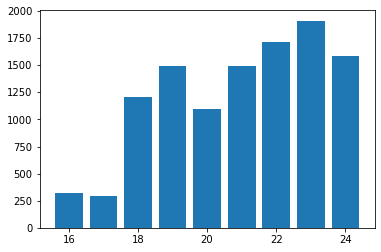

In [202]:
fig, ax = plt.subplots()
oy_by_age_values = list(oy_df.groupby('agep').sum()['pwgtp'])
ax.bar(list(oy_df.groupby('agep').sum()['pwgtp'].keys()), oy_by_age_values)
plt.show()

### breakdown of OY per age group (16-18, 19-21, 22-24)

In [222]:
counter = 0
current_val = 0
oy_by_age_group = []
for value in oy_by_age_values:
    counter += 1
    current_val += value
    if counter == 3:
        counter = 0
        oy_by_age_group.append(current_val)
        current_val = 0
oy_by_age_group

[1815.0, 4083.0, 5217.0]

## visualization of youth (not oy specific) by age in SKC

In [189]:
youth_df.groupby('agep').sum()['pwgtp'].

agep
16.0    10407.0
17.0    10321.0
18.0     9413.0
19.0     8089.0
20.0     9121.0
21.0     8276.0
22.0     9551.0
23.0    10219.0
24.0    10486.0
Name: pwgtp, dtype: float64

In [188]:
list(youth_df.groupby('agep').sum()['pwgtp'])

[10407.0, 10321.0, 9413.0, 8089.0, 9121.0, 8276.0, 9551.0, 10219.0, 10486.0]

In [187]:
list(youth_df.groupby('agep').sum()['pwgtp'].keys())

[16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0]

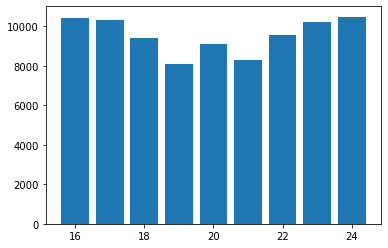

In [205]:
fig, ax = plt.subplots()
youth_by_age_values = list(youth_df.groupby('agep').sum()['pwgtp'])
ax.bar(list(youth_df.groupby('agep').sum()['pwgtp'].keys()), youth_by_age_values)
plt.show()

### breakdown of ALL YOUTH per age group (16-18, 19-21, 22-24)

In [223]:
counter = 0
current_val = 0
total_youth_by_age_group = []
for value in youth_by_age_values:
    counter += 1
    current_val += value
    if counter == 3:
        counter = 0
        total_youth_by_age_group.append(current_val)
        current_val = 0
total_youth_by_age_group

[30141.0, 25486.0, 30256.0]

## percentage of OY out of youth per age group (16-18, 19-21, 22-24)

<BarContainer object of 3 artists>

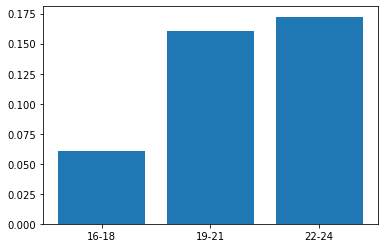

In [227]:
oy_percentage_of_age_pop = [int(o) / int(y) for o,y in zip(oy_by_age_group, total_youth_by_age_group)]
oy_percentage_of_age_pop

plt.bar(['16-18', '19-21', '22-24'], oy_percentage_of_age_pop)

In [325]:
import matplotlib.patches as mpatches

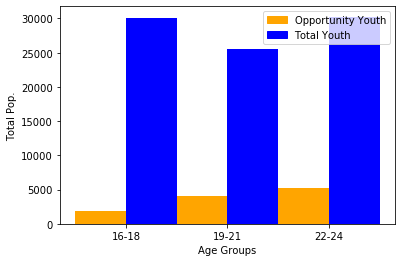

In [329]:
# age_list = list(range(len(age_groups)))
age_list =[1,2,3]
fig, ax = plt.subplots()
x = [1,2,3]
x_minus = [0.75, 1.75, 2.75]
x_plus = [1.25, 2.25, 3.25]
age_groups = ['16-18', '19-21', '22-24']
plt.bar(x_minus, oy_by_age_group, width=0.5, color='orange')
plt.bar(x_plus, total_youth_by_age_group, width=0.5, color='b')
# plt.legend((line1, line2, line3), ('label1', 'label2', 'label3'))
ax.set_xticks(x)
ax.set_xticklabels(age_groups)
ax.set_xlabel('Age Groups')
ax.set_ylabel('Total Pop.')
orange_patch = mpatches.Patch(color='orange', label='Opportunity Youth')
blue_patch = mpatches.Patch(color='blue', label='Total Youth')
plt.legend(handles=[orange_patch, blue_patch])
plt.show()

[16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0]


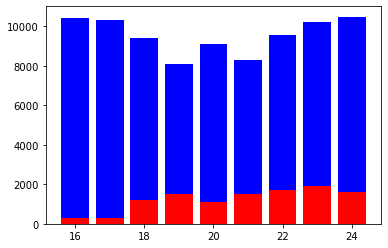

In [251]:
fig, ax = plt.subplots()
age_list = list(youth_df.groupby('agep').sum()['pwgtp'].keys())
print(age_list)
plt.bar(age_list, youth_by_age_values, color='blue')
plt.bar(age_list, oy_by_age_values, color='red')

plt.show()

## OY in 2016 vs. Now

<BarContainer object of 2 artists>

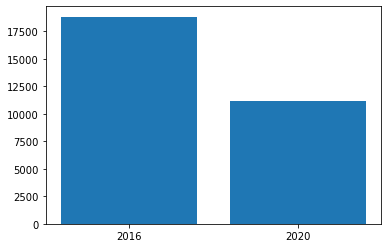

In [231]:
plt.bar(['2016', '2020'], [18817, 11115])

In [ ]:
# conn.close()